The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

# Tasks
1. What is the most commonly awarded gender and birth country?
* Store your answers as string variables top_gender and top_country.
2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
* Store this as an integer called max_decade_usa.
3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
* Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.
4. Who was the first woman to receive a Nobel Prize, and in what category?
* Save your string answers as first_woman_name and first_woman_category.
5. Which individuals or organizations have won more than one Nobel Prize throughout the years?
* Store the full names in a list named repeat_list.

In [4]:
# Loading in required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
nobel = pd.read_csv("data/nobel.csv")

### What is the most commonly awarded gender and birth country?

In [6]:
print(f"Most common gender and birth country are {nobel['sex'].value_counts().index[0]} and {nobel['birth_country'].value_counts().index[0]}.")

Most common gender and birth country are Male and United States of America.


In [67]:
top_gender = nobel['sex'].value_counts().idxmax()
top_country = nobel['birth_country'].value_counts().idxmax()

print(top_gender)
print(top_country)

Male
United States of America


Visualize the data by the number of counts of winning of awards by gender.

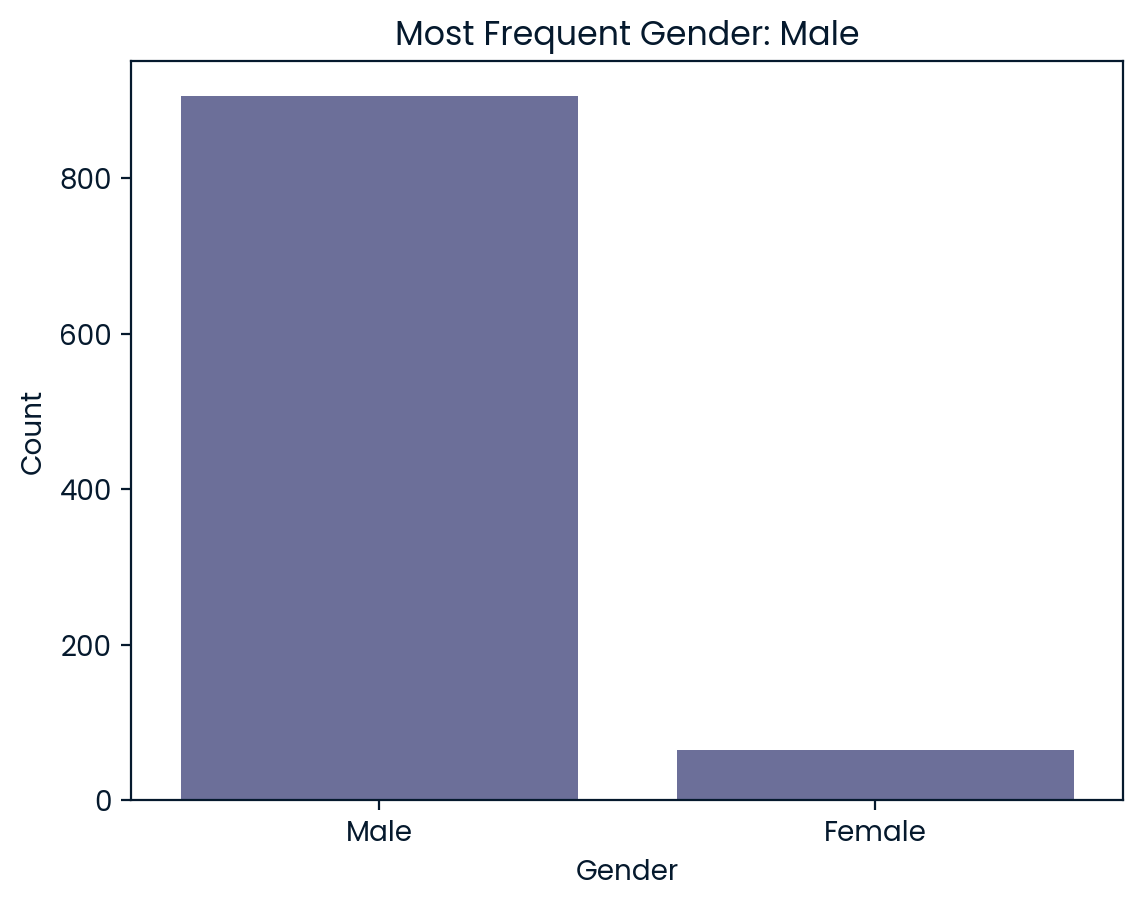

In [68]:
# Create a Series with counts for each gender
gender_counts = nobel['sex'].value_counts().sort_values(ascending=False)

# Create a bar chart
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title(f"Most Frequent Gender: {top_gender}")
plt.show()

Visualize the number of awards by birth country.

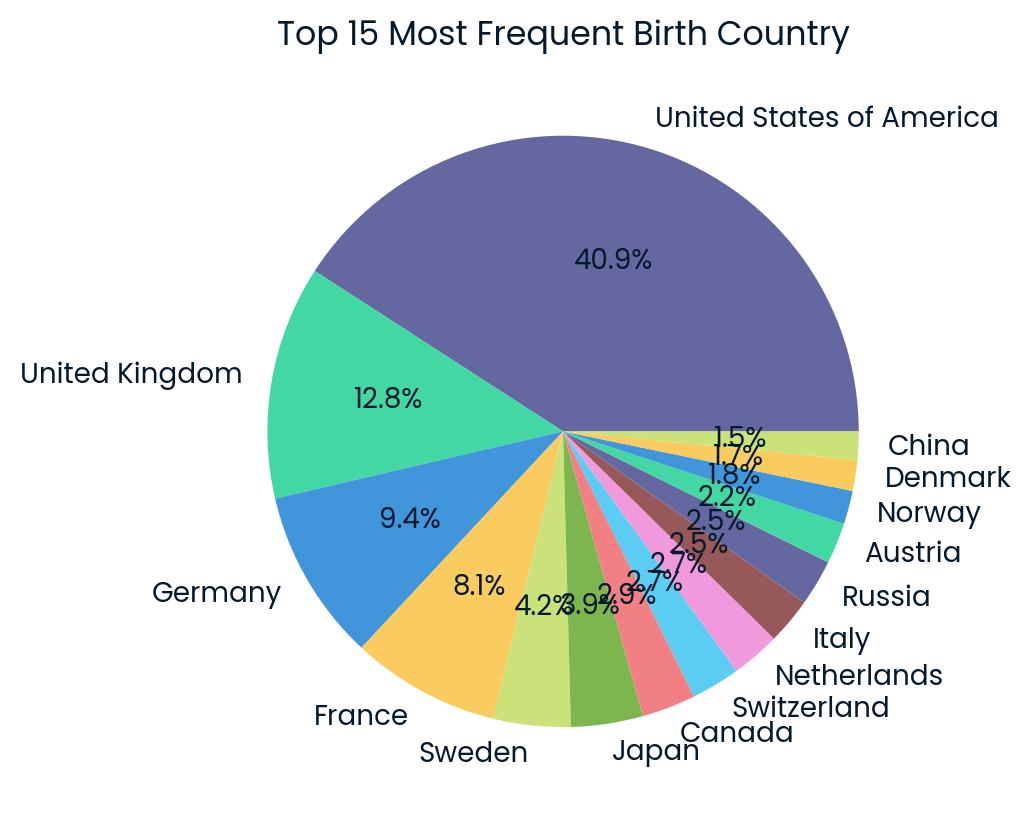

In [69]:
# Create a Series with counts for each country
country_counts = nobel['birth_country'].value_counts().sort_values(ascending=False).nlargest(15)

# Create a pie chart
plt.pie(country_counts.values, labels=country_counts.index, autopct="%1.1f%%")
plt.title(f"Top 15 Most Frequent Birth Country")
plt.show()

### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [70]:

# Create a new column named 'us_born' indicating whether the winner's birth country is the United States
nobel['us_born'] = nobel['birth_country'] == 'United States of America'

# Convert 'year' column to a numeric type
nobel['year'] = pd.to_numeric(nobel['year'], errors='coerce')

# Create a new column named 'decade' to represent the specific decade of the Nobel Prize
nobel['decade'] = (nobel['year'] // 10) * 10

# Group the data by decade and calculate the ratio of US-born winners to total winners for each decade
decade_ratios = nobel.groupby('decade')['us_born'].mean()

# Identify the decade with the highest ratio of US-born winners
max_decade_usa = decade_ratios.idxmax()


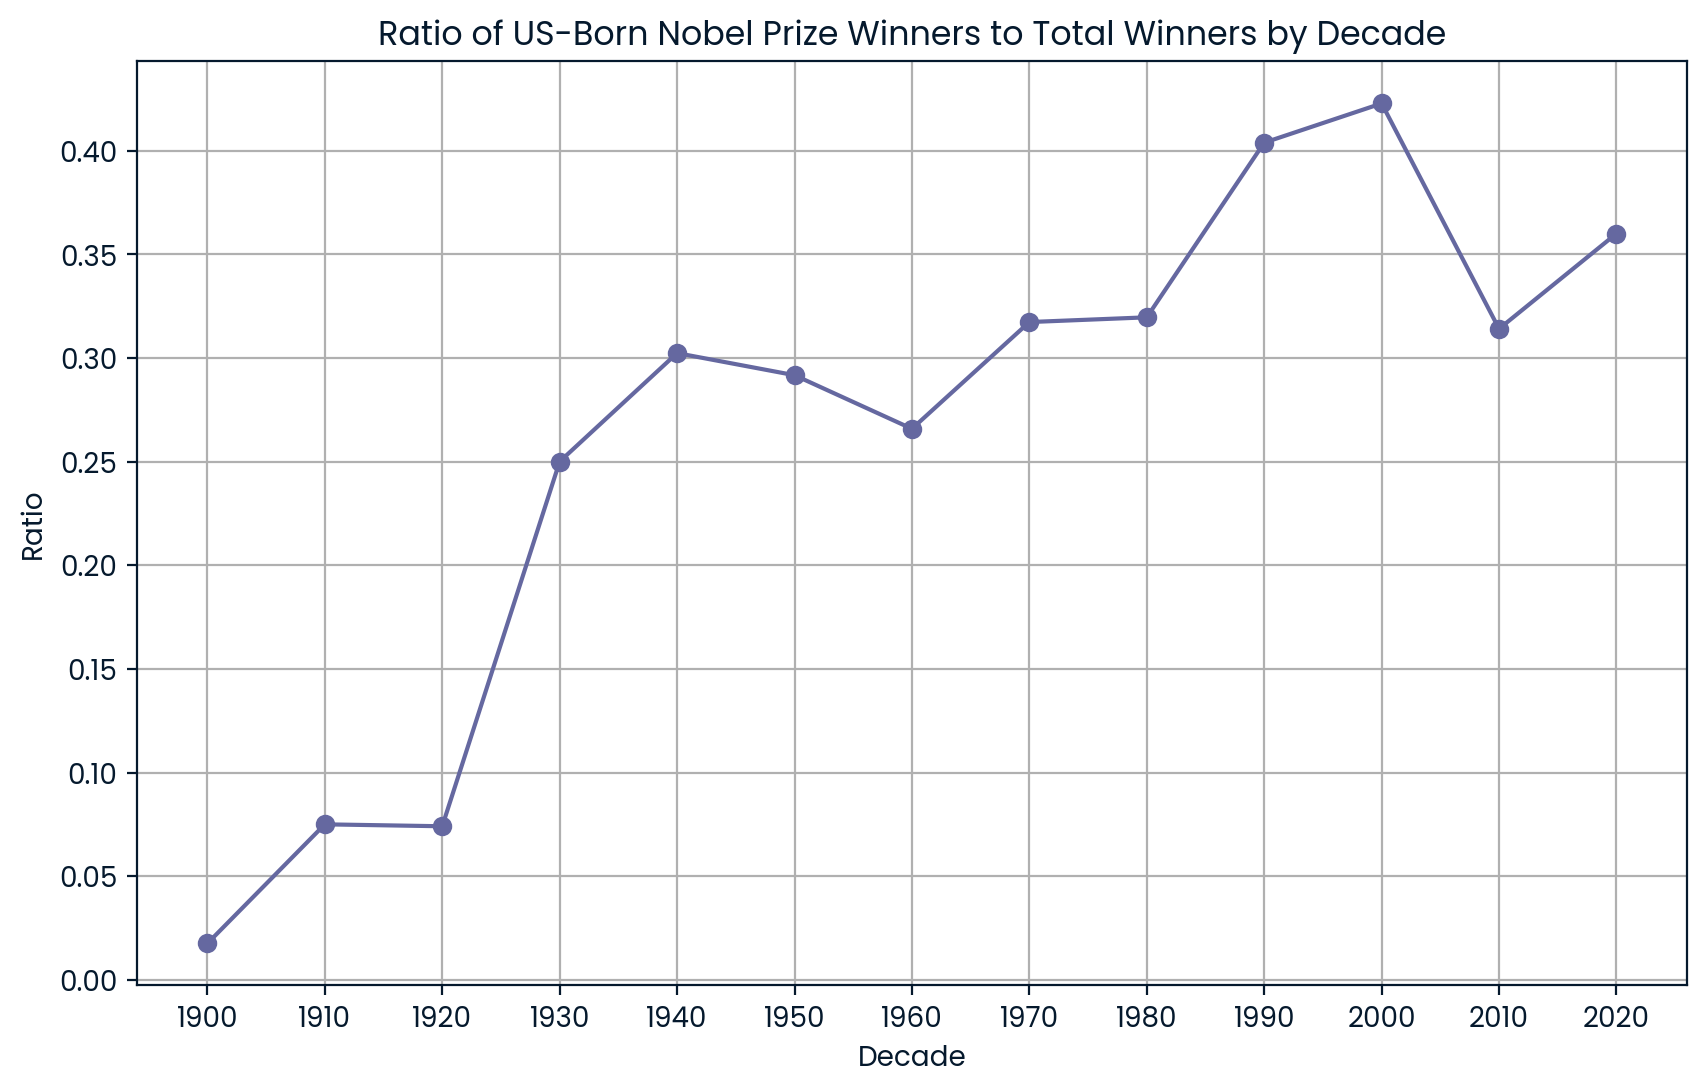

Decade with the highest ratio of US-born Nobel Prize winners to total winners: 2000


In [71]:
# Plot the trend of the ratio over decades
decade_ratios.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Ratio of US-Born Nobel Prize Winners to Total Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('Ratio')
plt.grid(True)
plt.xticks(decade_ratios.index)
plt.show()

print("Decade with the highest ratio of US-born Nobel Prize winners to total winners:", max_decade_usa)

### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [73]:
nobel['female_winner'] = nobel['sex'] == 'Female'
df_female = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female_dict = {
    df_female[df_female['female_winner'] == df_female['female_winner'].max()]['decade'].values[0]: df_female[df_female['female_winner'] == df_female['female_winner'].max()]['category'].values[0]
}
max_female_dict

{2020: 'Literature'}

Visualize the data by ratio of female winners by decades and categories.

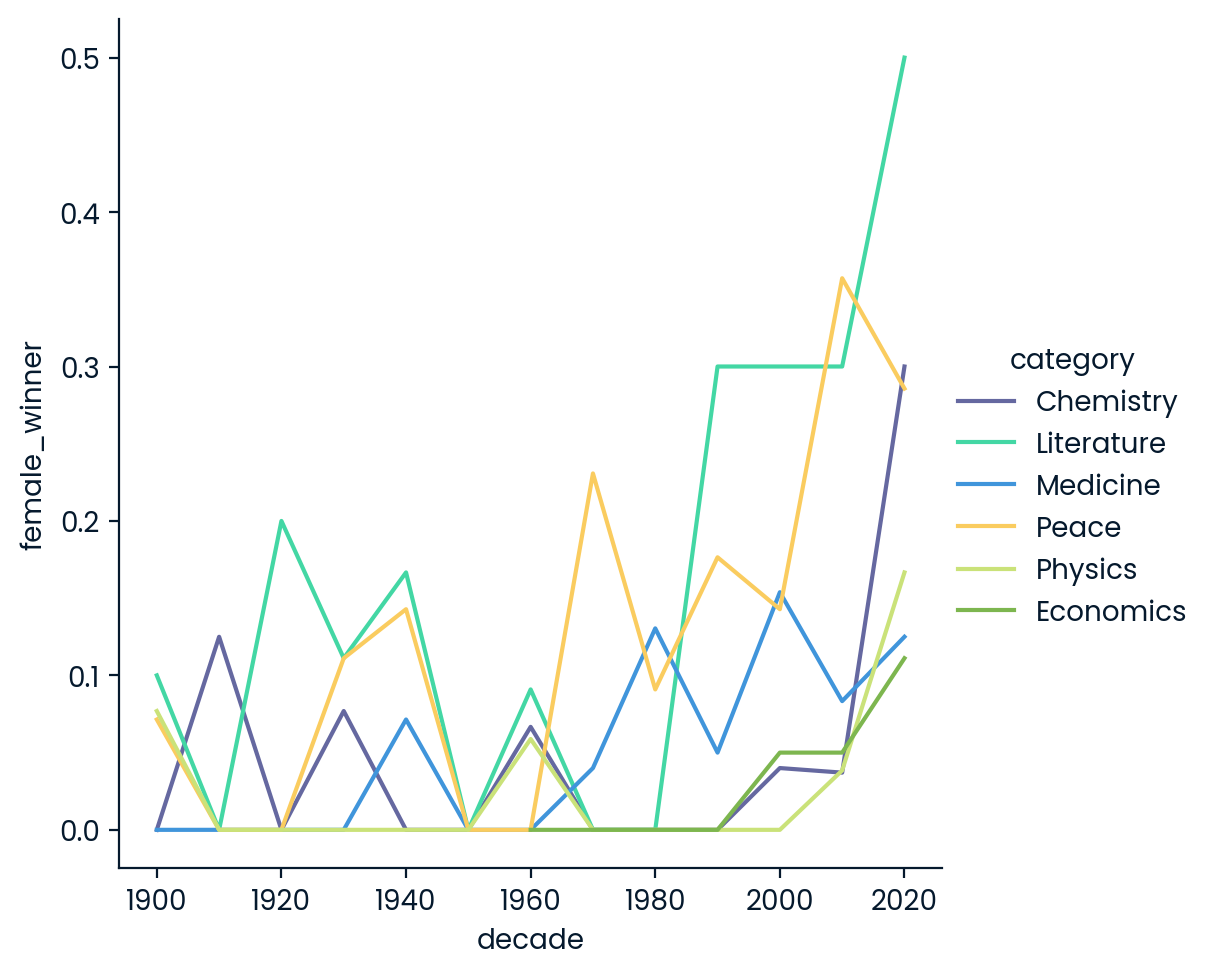

In [75]:
sns.relplot(x='decade', y='female_winner', data=df_female, hue='category', kind='line');

### Who was the first woman to receive a Nobel Prize, and in what category?

In [84]:
# Who was the first woman to receive a Nobel Prize, and in what category?
first_woman = nobel[nobel['sex'] == 'Female'].sort_values('year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

print("The first woman to receive a Nobel Prize is " + first_woman_name + " in " + first_woman_category +" category")

The first woman to receive a Nobel Prize is Marie Curie, née Sklodowska in Physics category


### Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [91]:
repeat_list = nobel['full_name'].value_counts()[nobel['full_name'].value_counts() > 1].index.tolist()
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']